<a href="https://colab.research.google.com/github/skyil7/SejongUniv_ML/blob/master/4.Discriminant%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LDA와 QDA

In [1]:
import seaborn as sns
iris=sns.load_dataset('iris')
X=iris.drop('species',axis=1)
y_=iris['species']

from sklearn.preprocessing import LabelEncoder 
classle=LabelEncoder() 
y=classle.fit_transform(iris['species'].values) 

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4, random_state=123, stratify=y)

In [2]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y_.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

#LDA

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis(store_covariance=True) # n_components: 사영할 축의 차원, store_covariance: 모수 저장여부
#cld=LinearDiscriminantAnalysis(n_components=2, store_covariance=True)

cld.fit(X_train, y_train)
y_train_pred=cld.predict(X_train)
y_test_pred=cld.predict(X_test)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred)) 
print(accuracy_score(y_test, y_test_pred)) 

0.9777777777777777
0.9833333333333333


In [6]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))  #setosa, versicolor, virginica

[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]


In [7]:
print(cld.means_)
print(cld.xbar_)
print(cld.covariance_)
print(cld.intercept_)
print(cld.coef_)

[[4.99333333 3.39       1.51       0.25666667]
 [5.84333333 2.72       4.19666667 1.28333333]
 [6.50666667 2.96       5.48       2.03333333]]
[5.78111111 3.02333333 3.72888889 1.19111111]
[[0.23678889 0.08888889 0.14033704 0.03473704]
 [0.08888889 0.11007778 0.05256667 0.0303    ]
 [0.14033704 0.05256667 0.15716296 0.03279259]
 [0.03473704 0.0303     0.03279259 0.03735556]]
[-12.66885448  -3.1041685  -41.67596068]
[[  6.32998612  13.9186009  -18.76291659 -24.88599546]
 [ -1.42414426  -4.81444274   5.10515599   3.13434008]
 [ -4.90584186  -9.10415815  13.65776061  21.75165538]]


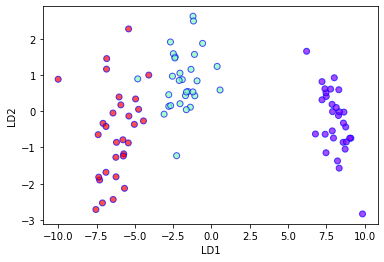

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis()
# fit_transform으로 차원축소된 실제 데이터를 get
X_lda = cld.fit_transform(X_train, y_train)

from matplotlib import pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

cqd=QuadraticDiscriminantAnalysis(store_covariance=True)

cqd.fit(X_train, y_train)
y_train_pred=cqd.predict(X_train)
y_test_pred=cqd.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred)) # train data에 대한 accuracy
print(accuracy_score(y_test, y_test_pred)) # test data에 대한 accuracy

0.9777777777777777
0.9833333333333333


In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]


In [12]:
print(cqd.means_)
print(cqd.covariance_)

[[4.99333333 3.39       1.51       0.25666667]
 [5.84333333 2.72       4.19666667 1.28333333]
 [6.50666667 2.96       5.48       2.03333333]]
[array([[0.12547126, 0.10648276, 0.02627586, 0.01556322],
       [0.10648276, 0.14782759, 0.03044828, 0.01541379],
       [0.02627586, 0.03044828, 0.03196552, 0.007     ],
       [0.01556322, 0.01541379, 0.007     , 0.01012644]]), array([[0.22943678, 0.07117241, 0.14704598, 0.03488506],
       [0.07117241, 0.092     , 0.07593103, 0.03482759],
       [0.14704598, 0.07593103, 0.19757471, 0.05614943],
       [0.03488506, 0.03482759, 0.05614943, 0.02902299]]), array([[0.37995402, 0.0982069 , 0.2622069 , 0.05735632],
       [0.0982069 , 0.1017931 , 0.05675862, 0.0437931 ],
       [0.2622069 , 0.05675862, 0.2582069 , 0.03862069],
       [0.05735632, 0.0437931 , 0.03862069, 0.07678161]])]
